<a href="https://colab.research.google.com/github/StephanieApaza/Mercado_vehiculos_electricos_US/blob/main/Mercado_vehiculos_electricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO: ANÁLISIS DE TAMAÑO DE MERCADO DE VEHÍCULOS ELÉCTRICOS**

El análisis de tamaño de mercado para vehículos eléctricos implica un proceso de varios pasos que incluye definir el alcance del mercado, recopilar y preparar datos, modelar analíticamente y comunicar los hallazgos a través de visualización e informes. A continuación se muestra el proceso a seguir para la tarea de análisis de tamaño de mercado de vehículos eléctricos:

1.   Definir si el análisis es global, regional o centrado en países específicos.
2.   Recopilar información de asociaciones de la industria, empresas de investigación de mercado (por ejemplo, BloombergNEF, AIE) y publicaciones gubernamentales relevantes para el mercado de VE.
3.   Utilizar datos históricos para identificar tendencias en ventas, producción y mercado de VE.
4.   Analizar el tamaño del mercado y las tasas de crecimiento para diferentes segmentos de VE.
5.   Según el análisis del tamaño del mercado, proporcionar recomendaciones estratégicas para las empresas que buscan ingresar o expandirse en el mercado de VE.

Puede descargar el conjunto de datos desde [aquí](https://docs.google.com/spreadsheets/d/1XMuRBwuEyKM0EcwR_UUquiiXMi4ufhtXC8yRUntqwa8/edit?usp=drive_link).

## **IMPORTACIÓN DE LIBRERÍAS Y DATOS**

In [ ]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gspread
from google.colab import auth
from google.auth import default

In [ ]:
import plotly.express as px
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit
import plotly.graph_objects as go

In [ ]:
!pip install jupyter-dash

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 29.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('Electric_Vehicle_Population_Data').sheet1
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame.from_records(rows)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007800
2,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,53061051938
3,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006800
4,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032104


In [ ]:
columnas = df[:1].to_numpy()[0]
columnas

array(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code',
       'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Range', 'Base MSRP', 'Legislative District',
       'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract'], dtype=object)

In [ ]:
df.drop(0, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007800
2,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,53061051938
3,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006800
4,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032104
5,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,53035940100


In [ ]:
df.columns = columnas
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007800
2,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,53061051938
3,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006800
4,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032104
5,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,53035940100


## **LIMPIEZA DE DATOS**

In [ ]:
# Visualización de propiedades de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 1 to 177866
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         177866 non-null  object
 1   County                                             177866 non-null  object
 2   City                                               177866 non-null  object
 3   State                                              177866 non-null  object
 4   Postal Code                                        177866 non-null  object
 5   Model Year                                         177866 non-null  object
 6   Make                                               177866 non-null  object
 7   Model                                              177866 non-null  object
 8   Electric Vehicle Type                              177866 non-null  object
 9   Clea

In [ ]:
#Nombres de las columnas
columnas = list(df.columns)
total = len(df)

#Valores únicos comparados con el total de cada columna
for dato in columnas:
  val = len(df[dato].unique())
  if pd.to_numeric(df[dato], errors='coerce').notnull().all():
    print(f'Toda la columna "{dato}" tiene datos numéricos')
  porcentaje = round((val/total)*100,3)
  print(f'El porcentaje de los valores únicos en la columna "{dato}" con respecto al total es de {porcentaje}%')

El porcentaje de los valores únicos en la columna "VIN (1-10)" con respecto al total es de 6.089%
El porcentaje de los valores únicos en la columna "County" con respecto al total es de 0.111%
El porcentaje de los valores únicos en la columna "City" con respecto al total es de 0.407%
El porcentaje de los valores únicos en la columna "State" con respecto al total es de 0.026%
El porcentaje de los valores únicos en la columna "Postal Code" con respecto al total es de 0.485%
Toda la columna "Model Year" tiene datos numéricos
El porcentaje de los valores únicos en la columna "Model Year" con respecto al total es de 0.012%
El porcentaje de los valores únicos en la columna "Make" con respecto al total es de 0.022%
El porcentaje de los valores únicos en la columna "Model" con respecto al total es de 0.078%
El porcentaje de los valores únicos en la columna "Electric Vehicle Type" con respecto al total es de 0.001%
El porcentaje de los valores únicos en la columna "Clean Alternative Fuel Vehicle

In [ ]:
# Cambio de tipo de dato a columnas
df['County'] = df['County'].astype('category')
df['City'] = df['City'].astype('category')
df['State'] = df['State'].astype('category')
df['Postal Code'] = df['Postal Code'].astype('category')
df['Model Year'] = df['Model Year'].astype('int')
df['Make'] = df['Make'].astype('category')
df['Model'] = df['Model'].astype('category')
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].astype('category')
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].astype('category')
df['Electric Range'] = df['Electric Range'].astype('int')
df['Base MSRP'] = df['Base MSRP'].astype('int')
df['Legislative District'] = df['Legislative District'].astype('category')
df['Electric Utility'] = df['Electric Utility'].astype('category')

In [ ]:
# Visualización de las nuevas propiedades de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 1 to 177866
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         177866 non-null  object  
 1   County                                             177866 non-null  category
 2   City                                               177866 non-null  category
 3   State                                              177866 non-null  category
 4   Postal Code                                        177866 non-null  category
 5   Model Year                                         177866 non-null  int64   
 6   Make                                               177866 non-null  category
 7   Model                                              177866 non-null  category
 8   Electric Vehicle Type                              177866 non-nu

In [ ]:
# Visualización de la cantidad total de valores nulos de las columnas
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


## **ANÁLISIS DE DATOS**

In [ ]:
# Resumen de datos estadísticos de las columnas numéricas
df.describe()

,Model Year,Electric Range,Base MSRP
count,177866.000000,177866.000000,177866.000000
mean,2020.515512,58.842162,1073.109363
std,2.989384,91.981298,8358.624956
min,1997.000000,0.000000,0.000000
25%,2019.000000,0.000000,0.000000
50%,2022.000000,0.000000,0.000000
75%,2023.000000,75.000000,0.000000
max,2024.000000,337.000000,845000.000000


**1. Determinación del estado objeto del Análisis Regional:**

In [ ]:
est = df['State'].value_counts().sort_values(ascending=False)
est

,count
State,
WA,177477
CA,101
VA,46
MD,31
TX,23
NC,16
IL,15
CO,12
AZ,10


In [ ]:
top_est = df['State'].value_counts().head(10).sort_values(ascending=True)
top_est

,count
State,
AZ,10
FL,10
CO,12
IL,15
NC,16
TX,23
MD,31
VA,46
CA,101


**2. Análisis de mercado en el Estado de Washington**

In [ ]:
wa = df[df['State']== 'WA']
wa.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033007800
2,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,53061051938
3,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033006800
4,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032104
5,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,53035940100


**2.1 Número de vehículos por año**

In [ ]:
wa_year = wa['Model Year'].value_counts().sort_index()

In [ ]:
year_ve = wa_year[wa_year.index <= 2023]
year_ve

,count
Model Year,
1997,1
1998,1
1999,5
2000,7
2002,2
2003,1
2008,19
2010,23
2011,775


In [ ]:
df_wa = year_ve.reset_index()
df_wa.columns = ['Model Year', 'Number of Vehicles']

**2.2 Principales 10 Condados con más vehículos eléctricos**

In [ ]:
top_con = wa['County'].value_counts().head(10).sort_values(ascending=False)
top_con

,count
County,
King,92740
Snohomish,21001
Pierce,13782
Clark,10409
Thurston,6428
Kitsap,5840
Spokane,4586
Whatcom,4253
Benton,2147


**2.3 Principales ciudades en King con más vehículos eléctricos**

In [ ]:
kn = wa[wa['County'] == 'King']

In [ ]:
top_cit = kn['City'].value_counts().head(10).sort_values(ascending=False)
top_cit

,count
City,
Seattle,29447
Bellevue,8930
Redmond,6478
Kirkland,5362
Sammamish,5280
Renton,4980
Tukwila,2927
Kent,2782
Issaquah,2764


**2.4 Principales 10 marcas que venden más vehículos eléctricos**

In [ ]:
top_marc = wa['Make'].value_counts().head(10).sort_values(ascending=False)
top_marc

,count
Make,
TESLA,79471
NISSAN,13984
CHEVROLET,13652
FORD,9177
BMW,7556
KIA,7423
TOYOTA,6255
VOLKSWAGEN,4993
JEEP,4469


**2.4.1 Cuota de mercado de las principales marcas**

In [ ]:
total = wa['Make'].count()

In [ ]:
ve_mar = wa['Make'].value_counts().reset_index()
ve_mar.columns = ['Make', 'Número de vehículos']

In [ ]:
ve_mar['Cuota de mercado (%)'] = round((ve_mar['Número de vehículos']/total)*100,0)

In [ ]:
ve_mar = ve_mar.sort_values(by='Cuota de mercado (%)', ascending = False)
ve_mar.head(10)

,Make,Número de vehículos,Cuota de mercado (%)
0,TESLA,79471,45.0
2,CHEVROLET,13652,8.0
1,NISSAN,13984,8.0
3,FORD,9177,5.0
4,BMW,7556,4.0
5,KIA,7423,4.0
6,TOYOTA,6255,4.0
7,VOLKSWAGEN,4993,3.0
8,JEEP,4469,3.0
9,HYUNDAI,4399,2.0


**2.5 Principales 10 Modelos con mayor cantidad de vehículos eléctricos**

In [ ]:
top_modelo = wa['Model'].value_counts().head(10).sort_values(ascending=True)
top_modelo

,count
Model,
MUSTANG MACH-E,3316
WRANGLER,3383
ID.4,3928
VOLT,4782
MODEL X,5784
BOLT EV,6812
MODEL S,7711
LEAF,13352
MODEL 3,30009


**2.6 Principales Marcas y sus modelos de vehículos eléctricos**

In [ ]:
marc_w = wa['Make'].value_counts().head(3)
top_3_marc = marc_w.head(3).index
top_marc_data = wa[wa['Make'].isin(top_3_marc)]

In [ ]:
marc_mod = top_marc_data.groupby(['Make', 'Model'], observed=False).size().sort_values(ascending=False).reset_index(name='Número de vehículos')

In [ ]:
top_marc_mod = marc_mod.head(10)
top_marc_mod

,Make,Model,Número de vehículos
0,TESLA,MODEL Y,35921
1,TESLA,MODEL 3,30009
2,NISSAN,LEAF,13352
3,TESLA,MODEL S,7711
4,CHEVROLET,BOLT EV,6812
5,TESLA,MODEL X,5784
6,CHEVROLET,VOLT,4782
7,CHEVROLET,BOLT EUV,1770
8,NISSAN,ARIYA,632
9,CHEVROLET,SPARK,240


**2.7 Cantidad de vehículos eléctricos por Año y Modelo**

In [ ]:
mod = wa['Model'].value_counts()
top = mod.head(10).index
top

CategoricalIndex(['MODEL Y', 'MODEL 3', 'LEAF', 'MODEL S', 'BOLT EV',
                  'MODEL X', 'VOLT', 'ID.4', 'WRANGLER', 'MUSTANG MACH-E'],
                 categories=['330E', '500', '530E', '740E', ..., 'XC40', 'XC60', 'XC90', 'XM'], ordered=False, dtype='category', name='Model')

In [ ]:
top_mod = wa[wa['Model'].isin(top)]
top_mod = top_mod[top_mod['Model Year']<=2023]

In [ ]:
mod_ve = top_mod.groupby(['Model', 'Model Year'], observed = False).size().sort_values(ascending=False).reset_index(name='Número de vehículos')
mod_ve

,Model,Model Year,Número de vehículos
0,MODEL Y,2023,19029
1,MODEL 3,2023,7573
2,MODEL Y,2022,7369
3,MODEL Y,2021,6645
4,MODEL 3,2018,6104
...,...,...,...
1802,F-150,2015,0
1803,F-150,2014,0
1804,F-150,2013,0
1805,F-150,2012,0


**2.8 Relación de Rango eléctrico con los principales 10 Modelos**

In [ ]:
er = wa['Electric Range'].drop_duplicates()
top_er = er.nlargest(10)

In [ ]:
top_mod_er = wa[wa['Electric Range'].isin(top_er)].sort_values(by='Electric Range', ascending=True)
top_mod_er[['Model','Electric Range']]

,Model,Electric Range
148807,MODEL S,265
25895,MODEL S,265
129548,MODEL S,265
136958,MODEL S,265
20681,MODEL S,265
...,...,...
119591,MODEL S,337
99141,MODEL S,337
26118,MODEL S,337
37302,MODEL S,337


In [ ]:
uniq_top_mod = top_mod_er.drop_duplicates(subset = ['Electric Range']).head(10)
uniq_top_mod[['Model','Electric Range']]

,Model,Electric Range
148807,MODEL S,265
140437,MODEL 3,266
155907,MODEL S,270
123372,MODEL X,289
93973,MODEL Y,291
24904,MODEL X,293
44967,MODEL 3,308
21373,MODEL 3,322
626,MODEL S,330
14994,MODEL S,337


**2.9 Tipos de vehículos eléctricos**

In [ ]:
ev_type = wa['Electric Vehicle Type'].value_counts().reset_index()
ev_type.columns = ['Electric Vehicle Type', 'count']

In [ ]:
ev_type

,Electric Vehicle Type,count
0,Battery Electric Vehicle (BEV),138948
1,Plug-in Hybrid Electric Vehicle (PHEV),38529


**2.10 Relación de Tipos de vehículos eléctricos y Modelos**

In [ ]:
bateria_elec = wa[wa['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)']

In [ ]:
model_count = bateria_elec['Model'].value_counts().reset_index()
model_count.columns = ['Model','count']

In [ ]:
top_model_count = model_count.head(10).sort_values(by='count', ascending=True)
top_model_count

,Model,count
9,EV6,2154
8,IONIQ 5,2432
7,MUSTANG MACH-E,3316
6,ID.4,3928
5,MODEL X,5784
4,BOLT EV,6812
3,MODEL S,7711
2,LEAF,13352
1,MODEL 3,30009
0,MODEL Y,35921


**2.11 Distribución de Tipos de Vehículos eléctricos por Compañias de Electricidad**

In [ ]:
prov_tve = wa.groupby(['Electric Utility', 'Electric Vehicle Type']).size().reset_index(name='Número de vehículos eléctricos')
total_prov = prov_tve.groupby('Electric Utility')['Número de vehículos eléctricos'].transform('sum')

<ipython-input-20-30968fe8dd86>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prov_tve = wa.groupby(['Electric Utility', 'Electric Vehicle Type']).size().reset_index(name='Número de vehículos eléctricos')
<ipython-input-20-30968fe8dd86>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_prov = prov_tve.groupby('Electric Utility')['Número de vehículos eléctricos'].transform('sum')


In [ ]:
prov_tve['porcentaje'] = round((prov_tve['Número de vehículos eléctricos'] / total_prov) * 100,2)
prov_tve = prov_tve.sort_values(by=['Electric Utility', 'porcentaje'], ascending=[True, False])

In [ ]:
top_prov = prov_tve.groupby('Electric Utility')['Número de vehículos eléctricos'].sum().nlargest(10).index

<ipython-input-22-d78fda25c282>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_prov = prov_tve.groupby('Electric Utility')['Número de vehículos eléctricos'].sum().nlargest(10).index


In [ ]:
prov_ten = prov_tve[prov_tve['Electric Utility'].isin(top_prov)]
prov_ten.sort_values(by=['Electric Utility','porcentaje'], ascending=[True, False])

,Electric Utility,Electric Vehicle Type,Número de vehículos eléctricos,porcentaje
6,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,Battery Electric Vehicle (BEV),1913,68.39
7,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,Plug-in Hybrid Electric Vehicle (PHEV),884,31.61
40,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,Battery Electric Vehicle (BEV),5903,75.41
41,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,Plug-in Hybrid Electric Vehicle (PHEV),1925,24.59
64,BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,Battery Electric Vehicle (BEV),1166,75.86
65,BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,Plug-in Hybrid Electric Vehicle (PHEV),371,24.14
68,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,Battery Electric Vehicle (BEV),860,69.13
69,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...,Plug-in Hybrid Electric Vehicle (PHEV),384,30.87
74,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,Battery Electric Vehicle (BEV),7507,73.79
75,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,Plug-in Hybrid Electric Vehicle (PHEV),2666,26.21


**2.12 Relación de la Eligibiliidad para vehículos de combustible alternativo limpio (CAFV) y Modelos**

In [ ]:
cafv = wa['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().sort_values(ascending=False).reset_index(name='Número de vehículos eléctricos')
cafv.columns = ['Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Número de vehículos eléctricos']
cafv

,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Número de vehículos eléctricos
0,Eligibility unknown as battery range has not b...,91791
1,Clean Alternative Fuel Vehicle Eligible,66166
2,Not eligible due to low battery range,19520


**2.13 Modelos con Vehículos de Combustible Alternativo Limpio**

In [ ]:
mod_eleg = wa[wa['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Clean Alternative Fuel Vehicle Eligible']

In [ ]:
model_elcount = mod_eleg['Model'].value_counts().reset_index()
model_elcount.columns = ['Model','count']

In [ ]:
top_model_eleg = model_elcount.head(10).sort_values(by='count', ascending=True)
top_model_eleg

,Model,count
9,X5,1898
8,RAV4 PRIME,2176
7,MODEL Y,2369
6,PACIFICA,2976
5,MODEL X,3294
4,BOLT EV,4315
3,VOLT,4782
2,MODEL S,6001
1,LEAF,10770
0,MODEL 3,13792


**2.14 Proyección de la cantidad de vehículos eléctricos que se venderán al 2030**

In [ ]:
ve_reg = wa['Model Year'].value_counts().sort_index()
ve_años = ve_reg[ve_reg.index <= 2023]
ve_años

,count
Model Year,
1997,1
1998,1
1999,5
2000,7
2002,2
2003,1
2008,19
2010,23
2011,775


In [ ]:
exp_cr = lambda x, a, b: a * np.exp(b * x)
x_data = ve_años.index - ve_años.index.min()
y_data = ve_años.values

In [ ]:
params, covariance = curve_fit(exp_cr, x_data, y_data)
params, covariance

(array([1.10091625, 0.414151  ]),
 array([[ 1.28939745, -0.04634902],
        [-0.04634902,  0.00166968]]))

In [ ]:
años_pronost = np.arange(2024, 2024 + 6) - ve_años.index.min()
años_pronost

array([27, 28, 29, 30, 31, 32])

In [ ]:
valor_pronost = exp_cr(años_pronost, *params)
valor_pronost

array([ 79080.35109745, 119655.33902966, 181048.76824156, 273942.28078413,
       414498.11523206, 627171.1217383 ])

In [ ]:
dato_pronost = dict(zip(años_pronost + ve_años.index.min(), valor_pronost))
dato_pronost

{2024: 79080.35109745454,
 2025: 119655.33902966419,
 2026: 181048.7682415557,
 2027: 273942.28078412963,
 2028: 414498.1152320602,
 2029: 627171.1217382975}

In [ ]:
años = np.arange(ve_años.index.min(), 2029 + 1)
años

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029])

In [ ]:
años_act = ve_años.index
años_act

Index([1997, 1998, 1999, 2000, 2002, 2003, 2008, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='Model Year')

In [ ]:
total_años = np.arange(2024, 2029 + 1)
total_años

array([2024, 2025, 2026, 2027, 2028, 2029])

In [ ]:
val_act = ve_años.values
val_act

array([    1,     1,     5,     7,     2,     1,    19,    23,   775,
        1614,  4399,  3496,  4826,  5469,  8536, 14286, 10913, 11740,
       19063, 27709, 57520])

In [ ]:
total_val = [dato_pronost[year] for year in total_años]
total_val

[79080.35109745454,
 119655.33902966419,
 181048.7682415557,
 273942.28078412963,
 414498.1152320602,
 627171.1217382975]

# **Visualización de Resultados**

In [ ]:
colors = ['#004173', '#0d47a1', '#1565c0', '#1976d2', '#1e88e5', '#2196f3', '#42a5f5', '#64b5f6', '#90caf9', '#bbdefb']

fig = px.bar(top_est, x=top_est.values, y=top_est.index, orientation='h', title="<b><i>Principales 10 Estados con más Vehículos Eléctricos</i></b>",
             color_discrete_sequence=colors)
fig.update_traces(texttemplate='%{x:.0f}', textposition='outside')
fig.update_layout(
    title={
        'y': 0.9,  # Posición vertical del título
        'x': 0.5,  # Posición horizontal del título
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}},
    xaxis_title={
        'text': "<b><i>Cantidad de vehículos</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    yaxis_title={
        'text': "<b><i>Estados</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    xaxis = dict(tickformat=','))

fig.show()

Washington tiene una accesibilidad incomparable al aire libre con 250,000 acres de parques en el área metropolitana. También resulta ser número 1 en los EE.UU. en edificios con certificación LEED. En 2022, inició la construcción de una instalación exclusiva para autobuses eléctricos que admitirá autobuses de cero emisiones cuando se inaugure en 2027 y los primeros autobuses eléctricos comenzarán a operar en 2023.
https://washington.org/es/meetings/dc-green-facts

In [ ]:
fig = px.line(df_wa, x="Model Year", y="Number of Vehicles", title='<b><i>Número de Vehículos Eléctricos por Año en Washington<i><b>',
              color_discrete_sequence=colors)
fig.update_traces(texttemplate='%{x:.0f}')
fig.update_layout(
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}},
    xaxis_title={
        'text': "<b><i>Años</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    xaxis=dict(tickmode='linear', tickangle=-45, tickformat='%Y/'),
    yaxis_title={
        'text': "<b><i>Número de vehículos</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    yaxis=dict(tickformat=',', title_standoff=1))

fig.show()

Washington realiza lanzamientos de nuevos de reembolsos para vehículos eléctricos de hasta 9.000 dólares.
Y programas de Carga de Vehículos Eléctricos para ayudar a financiar infraestructura que respalda el transporte limpio en comunidades.
https://www.greencars.com/es-us/noticias/el-estado-de-washington-lanza-nuevos-reembolsos-para-vehiculos-electricos-de-hasta-9-000-dolares

In [ ]:
fig = px.bar(top_con, x= top_con.values, y= top_con.index, orientation = 'h',
             title = "<b><i>Principales 10 Condados con más Vehículos Eléctricos<i><b>",
             color=top_con.index,
             color_discrete_sequence=colors)
fig.update_traces(texttemplate='%{x:.0f}', textposition='outside')
fig.update_layout(
    title={
        'y': 0.9,  # Posición vertical del título
        'x': 0.5,  # Posición horizontal del título
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}},
    xaxis_title={
        'text': "<b><i>Cantidad de vehículos</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    yaxis_title={
        'text': "<b><i>Condados</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    xaxis = dict(tickformat=','))
fig.show()

In [ ]:
fig = px.bar(top_cit, x= top_cit.values, y= top_cit.index, orientation = 'h',
             title = "<b><i>Principales 10 Ciudades con más Vehículos Eléctricos en el Condado de King<i><b>",
             color=top_cit.index,
             color_discrete_sequence=colors)
fig.update_traces(texttemplate='%{x:.0f}', textposition='outside')
fig.update_layout(
    title={
        'y': 0.9,  # Posición vertical del título
        'x': 0.5,  # Posición horizontal del título
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}},
    xaxis_title={
        'text': "<b><i>Cantidad de vehículos eléctricos</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    yaxis_title={
        'text': "<b><i>Ciudades</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    xaxis = dict(tickformat=',',  title_standoff=20))
fig.show()

In [ ]:
fig = px.bar(top_marc, x=top_marc.values, y=top_marc.index, orientation='h',
             title="<b><i>Principales 10 Marcas con más Vehículos Eléctricos Vendidos</i></b>",
             color=top_marc.index,
             color_discrete_sequence=colors)
fig.update_traces(texttemplate='%{x}', textposition='outside')
fig.update_layout(
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}},
    xaxis_title={
        'text': "<b><i>Cantidad de vehículos eléctricos</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    yaxis_title={
        'text': "<b><i>Marcas</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}, 'standoff':0.2},
    xaxis=dict(tickformat=',', title_standoff=20))

fig.show()

In [ ]:
fig = px.pie(ve_mar.head(10), values='Cuota de mercado (%)', names='Make', title='<b><i>Cuota de mercado (%) por Marca de Vehículos Eléctricos</i></b>',
             color_discrete_sequence=colors)
fig.update_layout(
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}})

fig.show()

In [ ]:
top_modelo_df = pd.DataFrame({'Model': top_modelo.index,'Count': top_modelo.values})
colors = ['#004173', '#0d47a1', '#1565c0', '#1976d2', '#1e88e5', '#2196f3', '#42a5f5', '#64b5f6', '#90caf9', '#bbdefb']

fig = px.bar(top_modelo_df, x='Count', y='Model', orientation='h',
             title="<b><i>Principales 10 Modelos con más Vehículos Eléctricos Vendidos</i></b>",
             color_discrete_sequence=colors)
fig.update_traces(texttemplate='%{x}', textposition='outside')
fig.update_layout(
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173', 'family': 'Arial'}},
    xaxis_title={
        'text': "<b><i>Cantidad de vehículos eléctricos</i></b>",
        'font': {'size': 18, 'color': '#004173', 'family': 'Arial'}},
    yaxis_title={
        'text': "<b><i>Modelos</i></b>",
        'font': {'size': 18, 'color': '#004173', 'family': 'Arial'}, 'standoff':0.1},
    xaxis=dict(tickformat=',', title_standoff=20))
fig.show()

In [ ]:
fig = px.sunburst(top_marc_mod, path=['Make','Model'], values='Número de vehículos',
                  title='<b><i>Principales Modelos de Vehículos Eléctricos de las Tres Principales Marcas<i><b>',
                  color_discrete_sequence=colors)
fig.update_layout(
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}})
fig.show()

In [ ]:
mod_ve

app = Dash()

# Definición del layout de la aplicación
app.layout = html.Div([
    dcc.Graph(id='graph-with-dropdown'),  # Gráfico vacío que se llenará con el callback
    dcc.Dropdown(
        id='model-dropdown',
        options=[{'label': model, 'value': model} for model in top],  # Solo los 10 principales modelos
        value=top[0],  # Valor inicial del dropdown
        multi=True)])
# Definición del callback para actualizar el gráfico cuando el dropdown cambie
@app.callback(
    Output('graph-with-dropdown', 'figure'),  # El gráfico que se va a actualizar
    Input('model-dropdown', 'value')  # El valor del dropdown que lo activará
)
def update_figure(selected_models):
    # Verificando si hay múltiples selecciones
    if isinstance(selected_models, str):
        selected_models = [selected_models]

    # Filtrando los datos para los modelos seleccionados
    filtered_df = mod_ve[mod_ve['Model'].isin(selected_models)]
    filtered_df = filtered_df.sort_values(by="Model Year")
    # Creación del gráfico usando los datos filtrados
    fig = px.line(filtered_df, x="Model Year", y="Número de vehículos",
                  color='Model',  # Colorear las líneas por modelo
                  line_shape='spline',  # Líneas suavizadas
                  title="<b><i>Número de vehículos por Año y Modelo<i><b>", color_discrete_sequence=colors)
    # Actualización del diseño del gráfico
    fig.update_traces(
        mode='lines+markers',
        marker=dict(size=10, line=dict(width=2)),
        hovertemplate='Modelo: %{text}<br>Año: %{x}<br>Número de vehículos: %{y}',
        text=filtered_df['Model'])
    fig.update_xaxes(tickmode='linear', dtick=1)
    # Mejora del layout
    fig.update_layout(
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}},
    xaxis_title={
        'text': "<b><i>Años</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    xaxis=dict(title_standoff=20),
    yaxis_title={
        'text': "<b><i>Número de vehículos</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
        legend_title="Modelos",
        template='plotly',
        hovermode="x unified",
    yaxis=dict(tickformat=',', title_standoff=1))

    return fig
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
fig = px.sunburst(uniq_top_mod, path=['Model','Electric Range'], values='Electric Range',
                  title='<b><i>Modelos de Vehículos Eléctricos con mayores Rangos Eléctricos<i><b>',
                  color_discrete_sequence=colors)
fig.update_layout(
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}})
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1626: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1626: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Un mayor Rango eléctrico ayuda a los vehículos a recorrer distancias con una carga completa de su bateria, lo que significa mayor autonomía y tecnología.

In [ ]:
colores_ap = ['#004173', '#2196f3', '#42a5f5']
fig = px.pie(ev_type, values='count', names='Electric Vehicle Type',
             title='<b><i>Tipos de Vehículos Eléctricos en el Estado de Washington</i></b>',
             color_discrete_sequence=colores_ap)
fig.update_layout(
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}})
fig.show()

Los **Vehículos eléctricos con Bateria** son completamente eléctricos y funcionan solo con energía almacenada recargable, no emiten gases contaminantes y dependen de electricidad.
Los **Vehículos Hibridos Enchufables** funcionan con electricidad durante un rango limitado, pero cuando se agota la bateria, utilizan el motor de combustión.

In [ ]:
colores_tev = ['#004173', '#1e88e5', '#2196f3', '#42a5f5', '#64b5f6', '#90caf9', '#bbdefb']
fig = px.bar(top_model_count, x='count', y='Model', orientation='h',
             title="<b><i>Modelos con Vehículos Eléctricos de Bateria</i></b>",
             color_discrete_sequence=colores_tev)

fig.update_layout(
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}},
    xaxis_title={
        'text': "<b><i>Cantidad de vehículos</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    yaxis_title={
        'text': "<b><i>Modelos</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}, 'standoff':0.2},
    xaxis=dict(tickformat=',', title_standoff=20))

fig.show()

Los modelos que ofrecen el tipo de vehículos eléctricos con Bateria, ayudan a disminuir las emisiones de gases contaminantes y reducen su mantenimiento debido a que tienen menos componentes mecánicos en comparación con los híbridos.

In [ ]:
fig = px.bar(prov_ten, y='Electric Utility', x='porcentaje', color='Electric Vehicle Type',
             title='<b><i>Porcentaje de Tipos de Vehículos Eléctricos por Proveedor de Electricidad</i></b>',
             labels={'porcentaje': 'Porcentaje (%)', 'Electric Utility': 'Proveedor de Electricidad'},
             color_discrete_sequence=['#004173', '#42a5f5'],
             text='porcentaje', orientation = 'h')
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    title={'y': 0.9, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top', 'font': {'size': 24, 'color': '#004173', 'family': 'Arial'}},
    xaxis_title={'text': "<b><i>Porcentaje (%)</i></b>", 'font': {'size': 18, 'color': '#004173', 'family': 'Arial'}},
    xaxis=dict(title_standoff=25),
    yaxis_title={'text': "<b><i>Proveedor de Electricidad</i></b>", 'font': {'size': 18, 'color': '#004173', 'family': 'Arial'}},
    yaxis=dict(title_standoff=1),
    template='plotly_white')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



En Washington existen suficientes proveedores de electricidad para los **vehículos eléctricos de bateria**, lo que significa suficientes estaciones de carga y acceso para las compradores.

In [ ]:
cafv = wa['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().sort_values(ascending=False).reset_index(name='Número de vehículos eléctricos')
cafv.columns = ['Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Número de vehículos eléctricos']
cafv

In [ ]:
colores_cf = ['#004173', '#2196f3', '#42a5f5']
fig = px.pie(cafv, values='Número de vehículos eléctricos', names='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
             title='<b><i>Vehículos Elegibles para Beneficios de Combustible Alternativo Limpio (CAFV)</i></b>',
             color_discrete_sequence=colores_cf)
fig.update_layout(
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}})
fig.show()

La capacidad de un vehículo eléctrico para ser clasificado como uno que utiliza combustibles alternativos limpios afecta a su elegibilidad para incentivos o exenciones gubernamentales.

In [ ]:
colores_cfe = ['#004173','#1e88e5', '#2196f3', '#42a5f5', '#64b5f6', '#90caf9', '#bbdefb']
fig = px.bar(top_model_eleg, x='count', y='Model', orientation='h',
             title="<b><i>Modelos de Vehículos Elegibles de Combustible Alternativo Limpio</i></b>",
             color_discrete_sequence=colores_cfe)

fig.update_layout(
    title={
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'color': '#004173','family': 'Arial'}},
    xaxis_title={
        'text': "<b><i>Cantidad de vehículos</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}},
    yaxis_title={
        'text': "<b><i>Modelos</i></b>",
        'font': {'size': 18, 'color': '#004173','family': 'Arial'}, 'standoff':0.2},
    xaxis=dict(tickformat=',', title_standoff=20))

fig.show()

Los modelos que ofrecen vehículos eléctricos elegibles para (CAFV), dan ventajas como incentivos gubernamentales (descuentos y excenciones de impuestos) y promueve la consciencia de sostenibilidad ambiental.

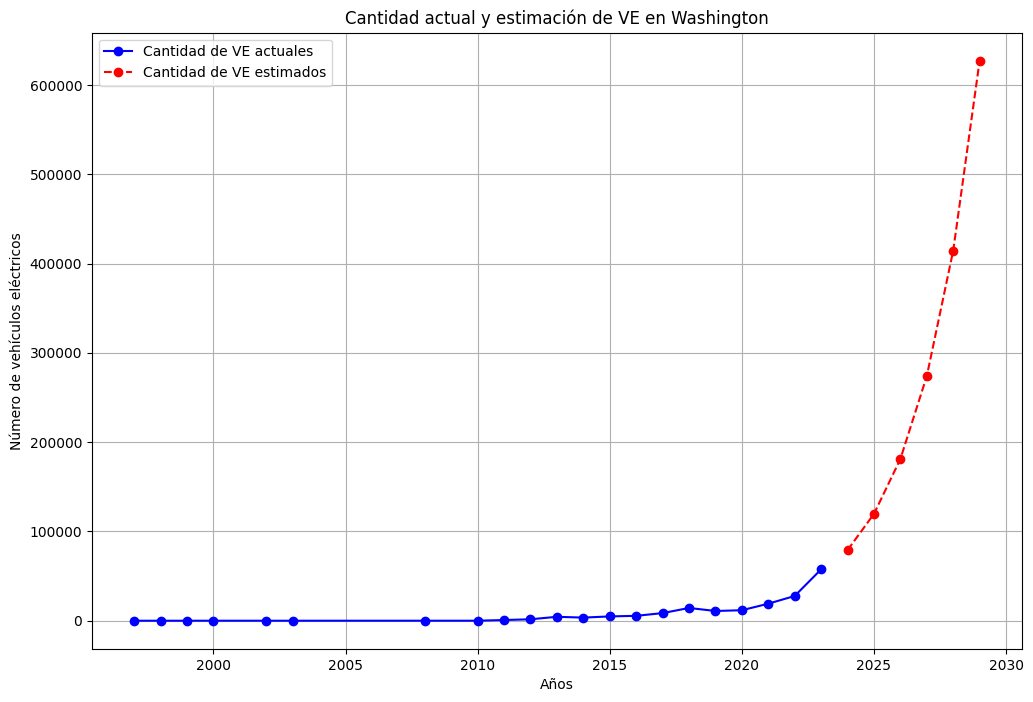

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(años_act, val_act, 'bo-', label='Cantidad de VE actuales')
plt.plot(total_años,total_val, 'ro--', label='Cantidad de VE estimados')
plt.title('Cantidad actual y estimación de VE en Washington')
plt.xlabel('Años')
plt.ylabel('Número de vehículos eléctricos')
plt.legend()
plt.grid(True)

plt.show()

El Proyecto de Ley 1287 de la Cámara de Representantes ha sido aprobado por la legislatura y esta en camino de convertirse en Ley. El proyecto de ley exige la prohibición de la venta de automóviles y camiones nuevos a gasolina en Washington a partir de 2030 y se aplicaría a los camiones y automóviles de propiedad privada en el estado.
https://www.washingtonpolicy.org/publications/detail/te-gusta-tu-coche-de-gasolina-el-estado-quiere-prohibirlos-para-2030

# **Conclusiones del análisis**

1. Washington se posiciona como un lugar clave para el crecimiento de vehículos eléctricos, desde el 2013 ha mostrado un crecimiento sostenido lo que refleja una tendencia positiva impulsada por incentivos y avances en infraestructura.
Destacandose entre los condados King y entre las ciudades Seattle.
2. El dominio del mercado lo tiene Tesla por poseer los modelos de vehículos más vendidos, seguido de Nissan y Chevrolet. Los factores que impulsan su dominio son que sus vehículos tienen los mayores Rangos eléctricos, son elegibles para los incentivos de combustible alternativo limpio y cuentan con los proveedores suficientes de electricidad.
4. La tendencia hacia la adquisición de vehículos eléctricos seguirá creciendo hasta el 2030, impulsada por políticas gubernamentales, conciencia ambiental y la reducción de combustibles.

**Recomendaciones:**
1. Para las empresas que buscan ingresar al mercado de vehículos eléctricos deben priorizar el desarrollo de vehículos con un alto Rango eléctrico, sean elegibles para incentivos y descuentos gubernamentales (para atraer a más compradores) y existan suficientes estaciones de carga.
2. Para las empresas que buscan expandirse es esencial realizar innovaciones para competir con Tesla y mejorar áreas como rango eléctrico y la tecnología de la bateria, los condados con menos vehículos eléctricos de Washington como Thruston, Kitsap y Spokane ofrecen oportunidades de expansión.